# Proyecto: Aplicación de análisis PCA para reconstrucción de imágenes usando menos variables de las que tiene el dataset original

### * El dataset consta de 400 fotografías correspondientes 40 personas (10 imágenes por persona). Cada imagen consta de 10304 pixeles (componentes originales). 

### * Veremos que realizando un buen análisis PCA podemos explicar el 95% de cada fotografía usando únicamente 190 pixeles (componentes principales).

In [1]:
%matplotlib inline

import numpy as np 
import imageio 
import matplotlib.pyplot as plt 
import pandas as pd 

# librería para análisis PCA
from sklearn.decomposition import PCA

# libreria para manipular directorios
from glob import iglob 

## Exploramos los datos:

In [2]:
# Cargamos una sóla imagen:
im = imageio.imread('./Data/imagenes_rostros/s3/3.pgm')
im = im.astype(np.uint8)
im.shape

(112, 92)

In [3]:
# Normalizamos la matriz de pixeles:
im = im / np.max(im)

# Extraemos numero de pixeles en dirección vertical y horizontal:
nz, nx = im.shape

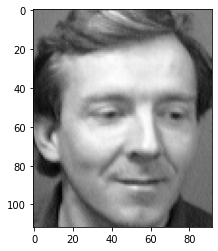

In [4]:
# Graficamos la matriz de pixeles
plt.imshow(im, cmap='gray') 
plt.show()

In [5]:
# Cargamos todas las imagenes:
data_caras = pd.DataFrame([])

for path in iglob('./Data/imagenes_rostros/*/*.pgm'):
    im = imageio.imread(path)
    im = im.flatten() # <--- pasamos la matriz de pixeles a un vector 
    cara_i = pd.Series(im , name=path)
    data_caras = data_caras.append(cara_i)

data_caras.shape

(400, 10304)

### El dataset consta de 400 registros, cada uno con 10304 componetes (pixeles)

In [7]:
# Extraemos numero de caras y numero de pixeles por cada cara:
n_caras , n_pixels_cara = data_caras.shape

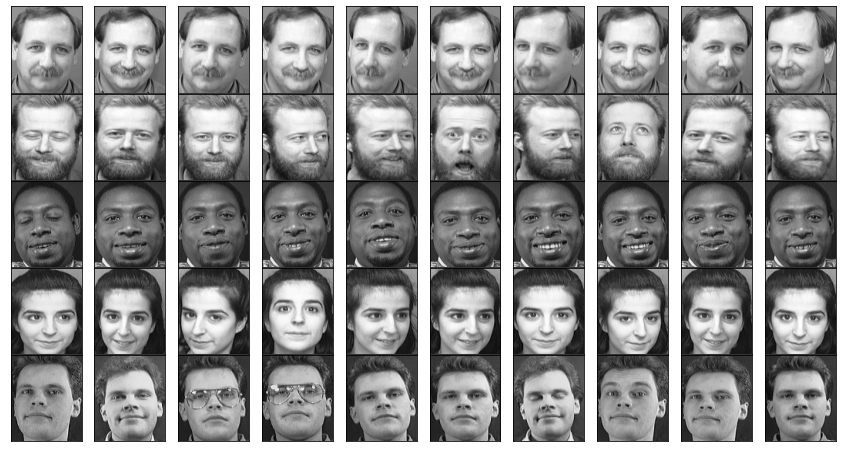

In [8]:
# Graficamos un conjunto de caras:

# Configuramos espacios de graficación:
fig , axes = plt.subplots(5 , 10 , figsize = (15,8),
    subplot_kw= {'xticks':[] , 'yticks':[] }, # <-- elimina los numeros de los ejes  
    gridspec_kw = {'hspace':0.01 , 'wspace':0.01} ) # <-- define espacios vertical y horizontal 

for i, ax in enumerate(axes.flat):
    ax.imshow(data_caras.iloc[i].values.reshape(nz, nx) , cmap='gray')

## Inicia análisis PCA:

In [9]:

# porcentaje de información a explicar con menos variables:
p = 0.95
# OBSERVACIÓN: 
# * Si "p" es un numero entre 0 y 1, este indicará porcentaje de información
# * Si "p" es un numero entero, este indicará número de componentes principales

# Declaramos la función PCA:
pca_meth = PCA( n_components = p )

# Aplicamos PCA a los datos numéricos
pca_meth.fit( data_caras )

PCA(n_components=0.95)

In [30]:
# Extraemos número de componentes principales que explican el porcentaje de los datos:
nc_pca = pca_meth.n_components_

print('En total hay ',n_caras,'registros (caras) cada uno con',n_pixels_cara,'componentes (varibles), sin embargo,')
print('Para preservar el',p*100,'% de la infromación sólo se requieren',nc_pca,'componentes (variables) principales')

En total hay  400 registros (caras) cada uno con 10304 componentes (varibles), sin embargo,
Para preservar el 95.0 % de la infromación sólo se requieren 190 componentes (variables) principales


In [13]:
# Extraemos la transformación [W] (de k x p) que lleva el dataset original
# de "p" variables al espacio reducido de "k" componentes principales (con k < p). 

W = pca_meth.components_
W.shape

(190, 10304)

### Obs: Notemos que cada renglón de la matriz W contiene los pixeles de una foto (explicada en un 95%)

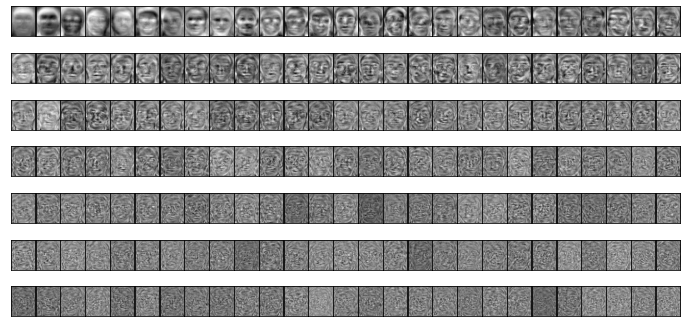

In [17]:
# Graficamos las caras en el espacio (reducido) de componentes principales:

# Definimos renglones y columnas para el grafico
renglones = 7
columnas = ( nc_pca ) // (renglones) # // <-- división entera 

# Configuramos espacios de graficación:
fig , axes = plt.subplots(renglones , columnas , figsize = (12,6),
    subplot_kw= {'xticks':[] , 'yticks':[] }, # <-- elimina los numeros de los ejes  
    gridspec_kw = {'hspace':0.01 , 'wspace':0.01} ) # <-- define espacios vertical y horizontal 

for i, ax in enumerate(axes.flat):
    ax.imshow(W[i].reshape(nz, nx) , cmap='gray')

## Proyectamos el dataset original al espacio de componentes principales (de menor dimensión):

In [19]:
# Obtenemos la transformación de los datos en el espacio de componentes principales
data_caras_pca = pca_meth.transform( data_caras )

In [26]:
# Dimensión de registros en el espacio de componentes principales:
data_caras_pca.shape

(400, 190)

In [27]:
# Dimensión de registros en el espacio original:
data_caras.shape

(400, 10304)

### Con esto podemo verificar que cada feature en el espacio original tiene 10304 variables, mientras que en el espacio de las componentes principales cada feature tiene 190 variables, las cuales explican el 95% del dataset original.

## Aplicamos transformación inversa para llevar los datos: del espacio de componentes principales al espacio del dataset original

In [28]:
# Aplicamos transformación inversa (del espacio de componentes principales al espacio original)
# para recuperar el 95% de las características principales de cada feature:
data_caras_aprox = pca_meth.inverse_transform(data_caras_pca)
data_caras_aprox.shape

(400, 10304)

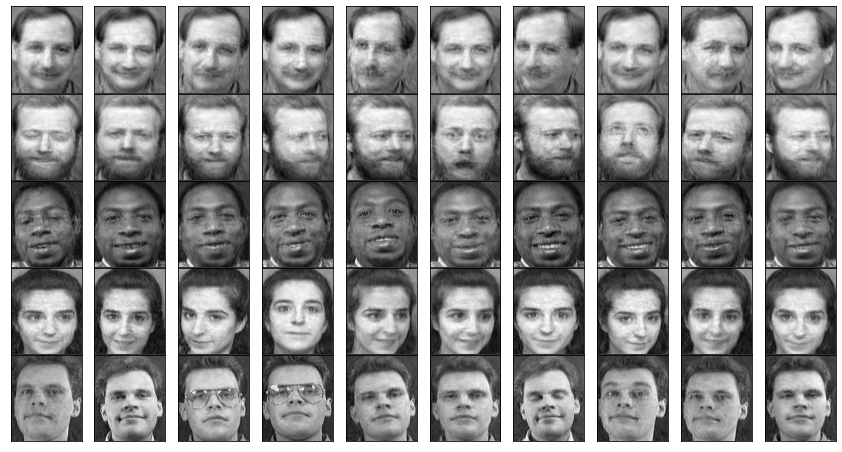

In [29]:
# Graficamos el conjunto de caras reconstruidas a partir de las componentes principales:

# Configuramos espacios de graficación:
fig , axes = plt.subplots(5 , 10 , figsize = (15,8),
    subplot_kw= {'xticks':[] , 'yticks':[] }, # <-- elimina los numeros de los ejes  
    gridspec_kw = {'hspace':0.01 , 'wspace':0.01} ) # <-- define espacios vertical y horizontal 

for i, ax in enumerate(axes.flat):
    ax.imshow(data_caras_aprox[i].reshape(nz, nx) , cmap='gray')